In [2]:
#Helper Packages
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from pathlib import Path
#Packages with tools for text processing.
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams

stop_words = stopwords.words('english')

In [3]:
print("Hello World")

Hello World


In [4]:
# Path to the jupyter notebook
home_dir = Path.cwd()
print(home_dir)

main_dir = home_dir.parent.parent
print(main_dir)
#data_dir = str(main_dir) + "/data"

/workspaces/Text-Mining
/


In [5]:
# More direct -- Setting data directory to "Data" folder
data_dir = Path.cwd() / "Data"
print(data_dir)


/workspaces/Text-Mining/Data


In [6]:
# download nltk

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [13]:
#  Load text data
df = pd.read_csv(data_dir / "NYT_article_data.csv")
print(df.columns)
print(df["snippet"].head())


Index(['web_url', 'headline', 'snippet', 'word_count', 'source',
       'type_of_material', 'date', 'id'],
      dtype='object')
0    Nick Kyrgios started his Brisbane Open title d...
1    British police confirmed on Tuesday they were ...
2    Marcellus Wiley is still on the fence about le...
3    Still reckoning with the fallout from her Emme...
4    As far as Arike Ogunbowale and coach Muffet Mc...
Name: snippet, dtype: object


In [14]:
# Print total number of NAs. No NULLS
print(df["snippet"].isna().sum())
# Drop NAs if any.
df = df.dropna(subset=["snippet"]).reset_index(drop=True)
print(df["snippet"].isna().sum())

0
0


In [15]:
df_text = df["snippet"]
print(type(df_text))

print(df_text[:5])

<class 'pandas.core.series.Series'>
0    Nick Kyrgios started his Brisbane Open title d...
1    British police confirmed on Tuesday they were ...
2    Marcellus Wiley is still on the fence about le...
3    Still reckoning with the fallout from her Emme...
4    As far as Arike Ogunbowale and coach Muffet Mc...
Name: snippet, dtype: object


In [16]:
df_text = df_text.dropna().reset_index(drop=True)
df_tokenized = [word_tokenize(i) for i in df_text]

In [17]:
document_words = df_tokenized[0]
print(document_words)

['Nick', 'Kyrgios', 'started', 'his', 'Brisbane', 'Open', 'title', 'defense', 'with', 'a', 'battling', '7-6', '(', '5', ')', '5-7', '7-6', '(', '5', ')', 'victory', 'over', 'American', 'Ryan', 'Harrison', 'in', 'the', 'opening', 'round', 'on', 'Tuesday', '.']


In [18]:
document_words = [word.lower() for word in document_words]

In [19]:
document_words = [word for word in document_words if word.isalpha()]
print(document_words[:10])

['nick', 'kyrgios', 'started', 'his', 'brisbane', 'open', 'title', 'defense', 'with', 'a']


In [28]:



process_texts = [
    [
           PorterStemmer().stem(w)
           for word in word_tokenize(text)
           if not (w := word.lower()) in stop_words
           if w.isalpha()
    ] 
    for text in df_text
]

wordcount = [len(text) for text in process_texts]

In [29]:
print(process_texts[0] [:10])
print(process_texts[5] [:10])
print(process_texts[10] [:10])
print(process_texts[15] [:10])
print(process_texts[20] [:10])

['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american']
['prohibit', 'vacat', 'rental', 'arrang', 'onlin', 'airbnb', 'move', 'closer', 'realiti', 'thursday']
['labor', 'movement', 'press', 'govern', 'get', 'feder', 'employe', 'back', 'work', 'highlight']
['william', 'seed', 'may', 'match', 'simona', 'halep', 'perhap', 'sister', 'venu', 'melbourn']
['epiphani', 'celebr', 'bring', 'togeth', 'hundr', 'peopl', 'romanian', 'villag', 'pietrosani', 'day']


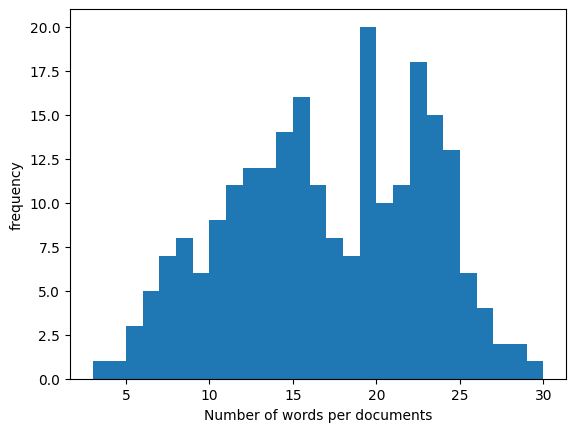

In [30]:
pd.Series(wordcount).plot.hist(
    grid=False,
    xlabel="Number of words per documents",
    ylabel="frequency",
    bins=len(set(wordcount)),
);


In [31]:
wordcount

[15,
 22,
 27,
 17,
 19,
 12,
 5,
 11,
 23,
 13,
 15,
 12,
 13,
 21,
 19,
 10,
 14,
 15,
 12,
 12,
 21,
 8,
 18,
 14,
 8,
 24,
 11,
 21,
 15,
 12,
 15,
 26,
 17,
 25,
 17,
 19,
 11,
 16,
 16,
 8,
 22,
 18,
 19,
 10,
 15,
 6,
 20,
 18,
 11,
 9,
 24,
 7,
 12,
 16,
 24,
 23,
 22,
 19,
 13,
 14,
 13,
 19,
 22,
 23,
 23,
 13,
 7,
 21,
 21,
 23,
 6,
 19,
 23,
 23,
 12,
 21,
 26,
 6,
 7,
 22,
 19,
 14,
 25,
 10,
 19,
 13,
 22,
 13,
 19,
 14,
 25,
 14,
 11,
 17,
 20,
 9,
 24,
 24,
 16,
 7,
 8,
 11,
 26,
 22,
 20,
 14,
 15,
 23,
 8,
 23,
 23,
 7,
 12,
 24,
 15,
 3,
 9,
 19,
 14,
 28,
 19,
 11,
 21,
 18,
 24,
 22,
 4,
 22,
 19,
 9,
 10,
 17,
 17,
 8,
 24,
 12,
 20,
 19,
 15,
 26,
 15,
 19,
 23,
 10,
 22,
 21,
 22,
 16,
 16,
 18,
 22,
 24,
 16,
 18,
 22,
 22,
 6,
 17,
 7,
 20,
 28,
 14,
 24,
 15,
 23,
 22,
 17,
 25,
 11,
 24,
 21,
 14,
 20,
 23,
 20,
 14,
 16,
 15,
 8,
 10,
 15,
 19,
 14,
 16,
 5,
 8,
 9,
 12,
 23,
 25,
 20,
 19,
 9,
 15,
 20,
 25,
 23,
 18,
 22,
 30,
 22,
 15,
 14,
 24,
 21,
 10